In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('project data')
df = df.dropna()
df

,egg,flour,sugar,butter,vanilla extract,milk,evaporated milk,condensed milk,shortening,powdered sugar,cornmeal,soda,baking powder,oat,category
0,1.0,240.0,300.024,113.04,0.0,264.0,0.0,0.0,0.0,0.000,0.0,4.8,0.0,0.0,cake
1,0.0,240.0,150.012,0.00,0.0,0.0,0.0,0.0,98.4,0.000,0.0,0.0,0.0,0.0,cake
2,1.0,120.0,100.008,28.26,0.0,88.0,0.0,0.0,0.0,0.000,0.0,0.0,6.0,0.0,cake
3,3.0,180.0,133.344,113.04,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,2.4,0.0,cookie
4,2.0,240.0,300.024,0.00,0.0,264.0,0.0,0.0,98.4,0.000,0.0,7.2,0.0,0.0,cake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91616,0.0,240.0,200.016,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,cake
91617,2.0,120.0,200.016,56.52,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,cake
91618,4.0,240.0,266.688,169.56,0.0,396.0,0.0,0.0,98.4,90.144,0.0,0.0,0.0,0.0,cake
91619,3.0,240.0,300.024,226.08,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,cookie


In [13]:
df['category'].value_counts()

category
cake      54070
cookie    29506
muffin     8045
Name: count, dtype: int64

In [14]:
X = df.drop(columns=["category"])  # Features
y = df["category"]  # Target variable

In [15]:
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

In [16]:
cov_matrix = np.cov(X_centered.T)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [17]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [18]:
projected_data = np.dot(eigenvectors.T, X_centered.T)

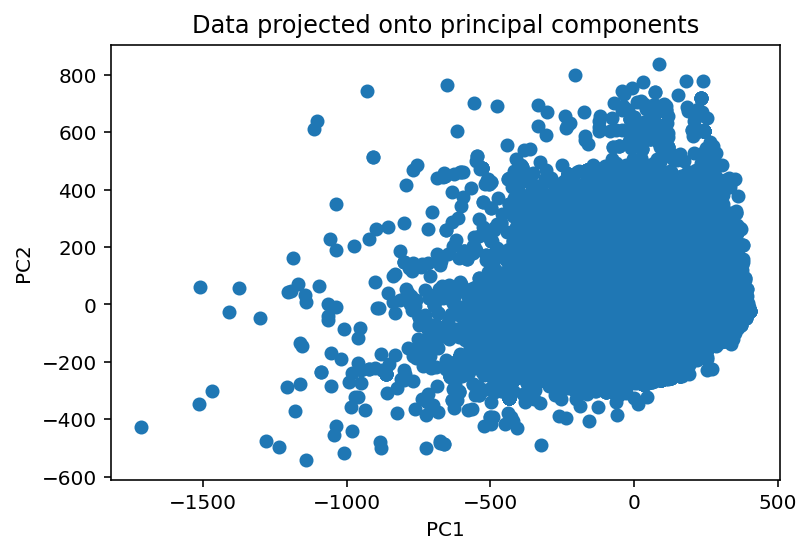

In [27]:
# plt.figure(figsize=(8, 6))
plt.scatter(projected_data[0, :], projected_data[1, :])
plt.title("Data projected onto principal components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [21]:
X = df.drop(columns=["category"])  # Features
y = df["category"]  # Target variable

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [24]:
label_mapping = {label: idx for idx, label in enumerate(y.unique())}
y_numeric = y.map(label_mapping)
label_mapping
# y_numeric
y_numeric = y.map(label_mapping)

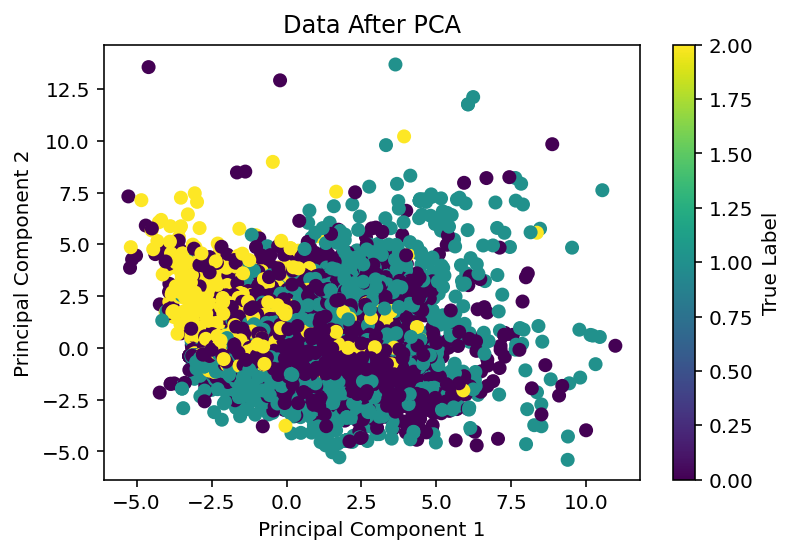

In [25]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data After PCA')
plt.colorbar(label='True Label')
plt.show()

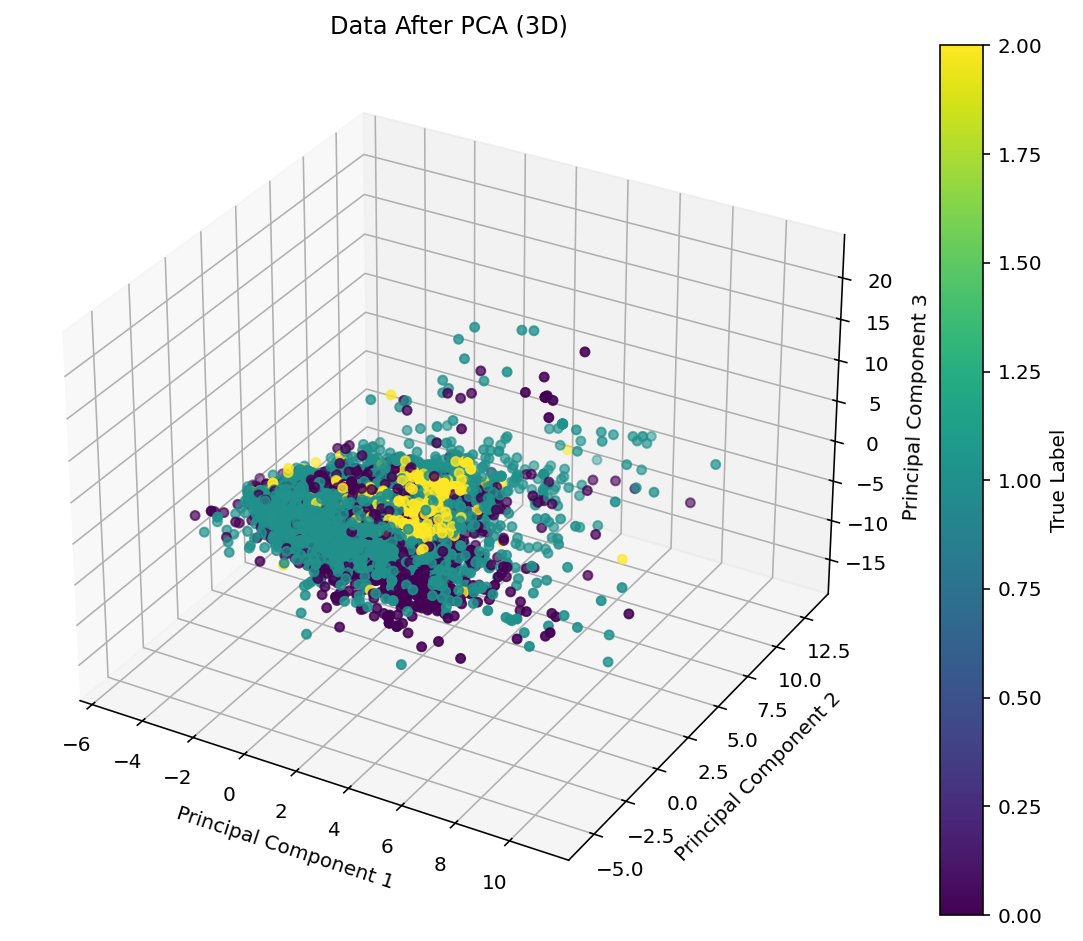

In [26]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Plot the 3D graph
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_numeric, cmap='viridis')
plt.colorbar(scatter, label='True Label')

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Data After PCA (3D)')

plt.show()